In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [14]:
#create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
#reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)



In [16]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 2217-A8BE

 Directory of c:\Users\nancy\OneDrive\Desktop\github\sqlaclchemy-challenge\SursUp

09/03/2023  08:02 PM    <DIR>          .
09/03/2023  08:02 PM    <DIR>          ..
09/02/2023  05:07 AM             7,009 app.py
09/02/2023  05:05 AM            74,832 climate_starter.ipynb
07/30/2023  10:06 PM    <DIR>          Resources
               2 File(s)         81,841 bytes
               3 Dir(s)  128,934,342,656 bytes free


In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
#Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0] 

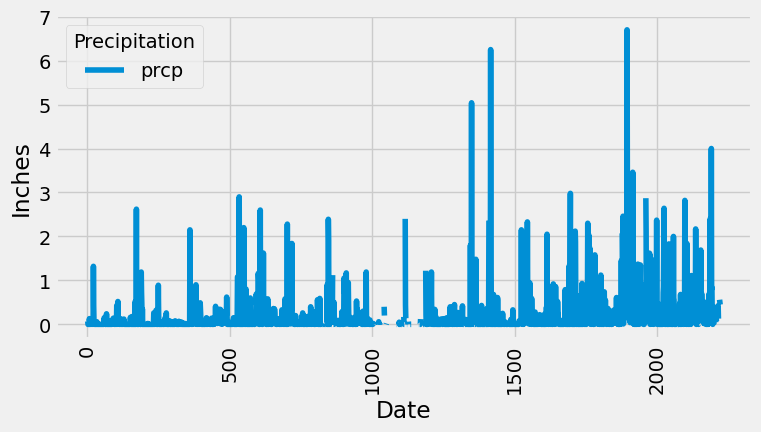

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.DataFrame(precip_data)
precip_data_df.head()

# Sort the dataframe by date
sort_df = precip_data_df.sort_index()
sort_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(figsize=(8, 4))
plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(title="Precipitation")
plt.xticks(rotation = 90)

plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.name)).count()

1

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_rank = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
station_rank

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_rank[0][0]
most_active_station

'USC00519281'

In [26]:
temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station==most_active_station).all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).filter(measurement.station == most_active_station).\
                filter(measurement.date >= one_year_ago).\
                order_by(measurement.date.desc()).all()
temp_df = pd.DataFrame(temp_data)
temp_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


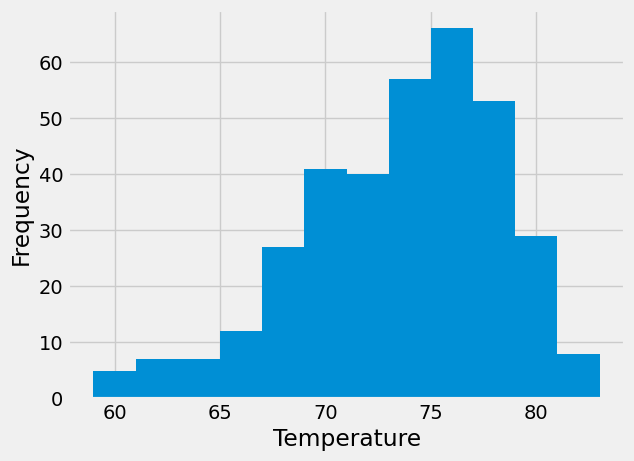

In [28]:
# Plot a histogram
plt.hist(temp_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [29]:
# Close Session
session.close()